In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS 

In [ ]:
data=pd.read_csv('............')
data.head()
dataset=data.iloc[:,2:].values
yd=data.iloc[:,1].values

In [ ]:
data.head()

,Unnamed: 0,sentiment,text
0,3204,sad,agree the poor in india are treated badly thei...
1,1431,joy,if only i could have spent the with this cutie...
2,654,joy,will nature conservation remain a priority in ...
3,2530,sad,coronavirus disappearing in italy show this to...
4,2296,sad,uk records lowest daily virus death toll since...


In [ ]:
data['text'][0]

'agree the poor in india are treated badly their poors seek a living in singapore and are treated like citizens they are given free medical treatment given food daily sim cards to call home to tell their family that they are fine if covid 19 case treated foc in hospitals'

In [ ]:
yd[5]

'fear'

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
yt = le.fit_transform(yd)

In [ ]:
yt[5]

1

In [ ]:
dataset.shape

(3090, 1)

In [ ]:
y=[]

In [ ]:
for i in range(0,3090):
  if(yt[i]==2):
    y.append(1)
  else:
    y.append(0)

In [ ]:
len(y)

3090

In [ ]:
set(y)

{0, 1}

In [ ]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


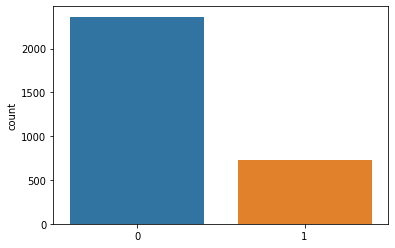

In [ ]:
sns.countplot(y)

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0,3090):
  review = re.sub('[^a-zA-Z]', ' ', data['text'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


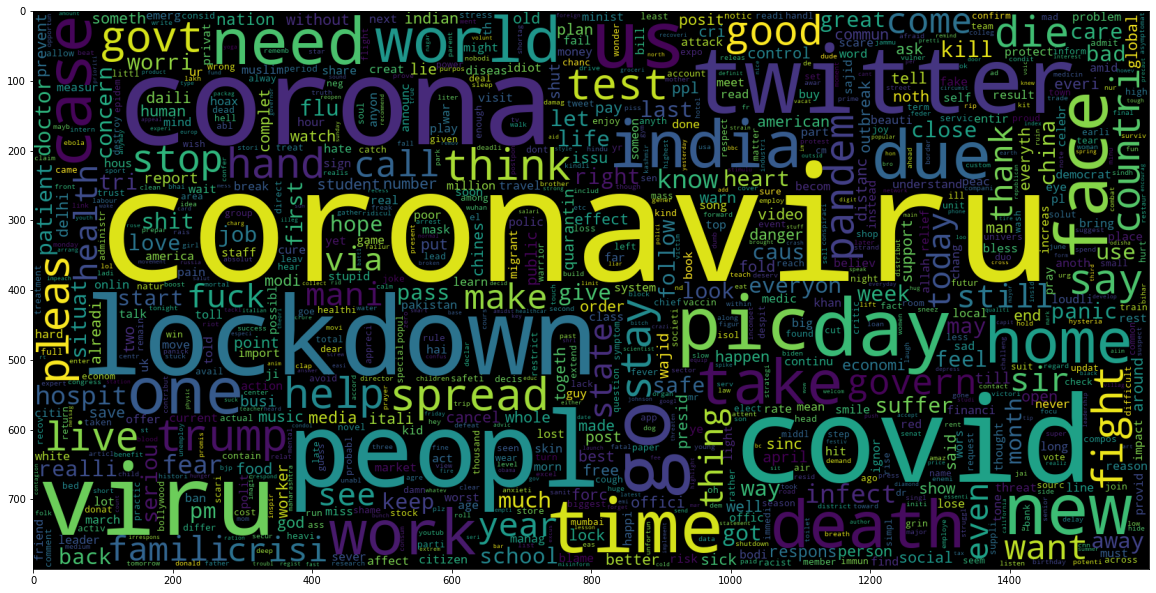

In [ ]:
data_neg = corpus[:]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
x = cv.fit_transform(corpus).toarray()
#y = data.iloc[:, 0].values
 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.1, random_state = 0)


In [ ]:

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

[[225  15]
 [ 24  45]]


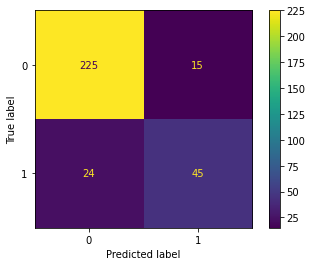

0.8737864077669902
0.8089599086888286
0.8268072289156627
0.7948369565217391
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       240
           1       0.75      0.65      0.70        69

    accuracy                           0.87       309
   macro avg       0.83      0.79      0.81       309
weighted avg       0.87      0.87      0.87       309

0.7948369565217391


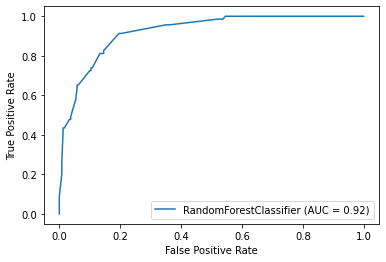

In [ ]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,accuracy_score ,f1_score, precision_score, recall_score,classification_report, plot_roc_curve,roc_auc_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
plot_confusion_matrix(classifier,x_test,y_test,values_format='d')
plt.show()
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred,average='macro'))
print(precision_score(y_test,y_pred,average='macro'))
print(recall_score(y_test,y_pred,average='macro'))
print(classification_report(y_test, y_pred))
print(roc_auc_score(y_test,y_pred,average='macro'))

plot_roc_curve(classifier,x_test,y_test)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression 
classifier1=LogisticRegression(random_state=0)
classifier1.fit(x_train, y_train) 
y_pred1=classifier1.predict(x_test)

[[229  11]
 [ 17  52]]


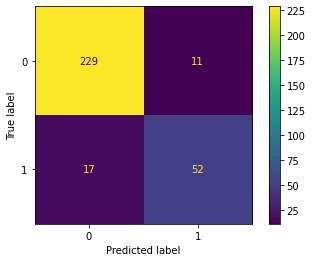

0.9093851132686084
0.8651328095772541
0.8781455671699574
0.853894927536232
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       240
           1       0.83      0.75      0.79        69

    accuracy                           0.91       309
   macro avg       0.88      0.85      0.87       309
weighted avg       0.91      0.91      0.91       309

0.853894927536232


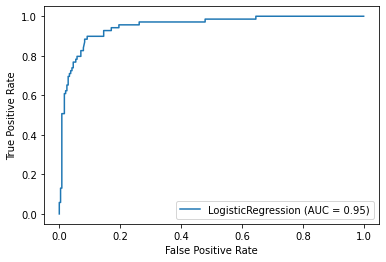

In [ ]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,accuracy_score ,f1_score, precision_score, recall_score,classification_report, plot_roc_curve,roc_auc_score
cm = confusion_matrix(y_test, y_pred1)
print(cm)
plot_confusion_matrix(classifier1,x_test,y_test,values_format='d')
plt.show()
print(accuracy_score(y_test, y_pred1))
print(f1_score(y_test, y_pred1,average='macro'))
print(precision_score(y_test,y_pred1,average='macro'))
print(recall_score(y_test,y_pred1,average='macro'))
print(classification_report(y_test, y_pred1))
print(roc_auc_score(y_test,y_pred1,average='macro'))

plot_roc_curve(classifier1,x_test,y_test)
plt.show()

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier2=MultinomialNB()
classifier2.fit(x_train, y_train)
y_pred2=classifier2.predict(x_test)

[[230  10]
 [ 18  51]]


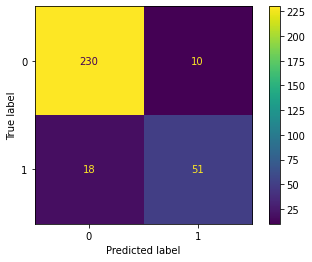

0.9093851132686084
0.8636191677175284
0.8817424643046008
0.848731884057971
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       240
           1       0.84      0.74      0.78        69

    accuracy                           0.91       309
   macro avg       0.88      0.85      0.86       309
weighted avg       0.91      0.91      0.91       309

0.8487318840579711


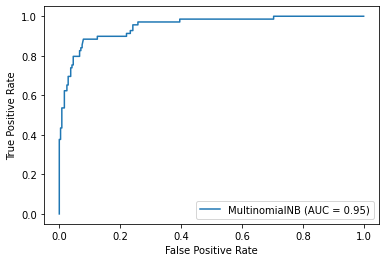

In [ ]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,accuracy_score ,f1_score, precision_score, recall_score,classification_report, plot_roc_curve,roc_auc_score
cm = confusion_matrix(y_test, y_pred2)
print(cm)
plot_confusion_matrix(classifier2,x_test,y_test,values_format='d')
plt.show()
print(accuracy_score(y_test, y_pred2))
print(f1_score(y_test, y_pred2,average='macro'))
print(precision_score(y_test,y_pred2,average='macro'))
print(recall_score(y_test,y_pred2,average='macro'))
print(classification_report(y_test, y_pred2))
print(roc_auc_score(y_test,y_pred2,average='macro'))

plot_roc_curve(classifier2,x_test,y_test)
plt.show()

In [ ]:
from sklearn.svm import LinearSVC 
classifier3=LinearSVC(random_state=42)
classifier3.fit(x_train, y_train)
y_pred3=classifier3.predict(x_test)

[[225  15]
 [ 16  53]]


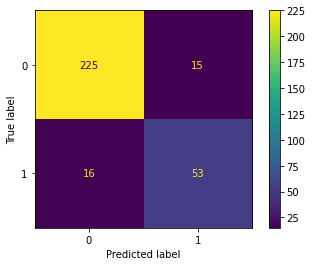

0.8996763754045307
0.8546367816440809
0.8565108616060533
0.8528079710144927
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       240
           1       0.78      0.77      0.77        69

    accuracy                           0.90       309
   macro avg       0.86      0.85      0.85       309
weighted avg       0.90      0.90      0.90       309

0.8528079710144927


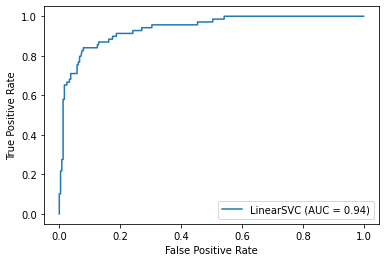

In [ ]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,accuracy_score ,f1_score, precision_score, recall_score,classification_report, plot_roc_curve,roc_auc_score
cm = confusion_matrix(y_test, y_pred3)
print(cm)
plot_confusion_matrix(classifier3,x_test,y_test,values_format='d')
plt.show()
print(accuracy_score(y_test, y_pred3))
print(f1_score(y_test, y_pred3,average='macro'))
print(precision_score(y_test,y_pred3,average='macro'))
print(recall_score(y_test,y_pred3,average='macro'))
print(classification_report(y_test, y_pred3))
print(roc_auc_score(y_test,y_pred3,average='macro'))

plot_roc_curve(classifier3,x_test,y_test)
plt.show()

In [ ]:
from sklearn.linear_model import  SGDClassifier
classifier4 =  SGDClassifier(random_state=42)
classifier4.fit(x_train, y_train) 
y_pred4 = classifier4.predict(x_test)

[[228  12]
 [ 19  50]]


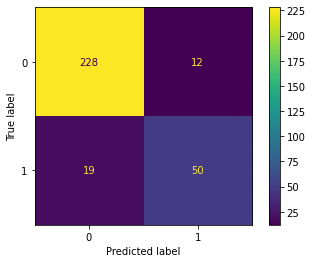

0.8996763754045307
0.8498518739125664
0.8647642679900744
0.8373188405797101
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       240
           1       0.81      0.72      0.76        69

    accuracy                           0.90       309
   macro avg       0.86      0.84      0.85       309
weighted avg       0.90      0.90      0.90       309

0.8373188405797102


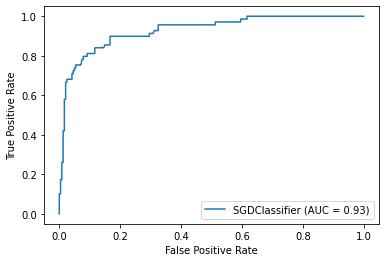

In [ ]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,accuracy_score ,f1_score, precision_score, recall_score,classification_report, plot_roc_curve,roc_auc_score
cm = confusion_matrix(y_test, y_pred4)
print(cm)
plot_confusion_matrix(classifier4,x_test,y_test,values_format='d')
plt.show()
print(accuracy_score(y_test, y_pred4))
print(f1_score(y_test, y_pred4,average='macro'))
print(precision_score(y_test,y_pred4,average='macro'))
print(recall_score(y_test,y_pred4,average='macro'))
print(classification_report(y_test, y_pred4))
print(roc_auc_score(y_test,y_pred4,average='macro'))

plot_roc_curve(classifier4,x_test,y_test)
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
classifier6=DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier6.fit(x_train, y_train)
y_pred6=classifier6.predict(x_test)

[[219  21]
 [ 23  46]]


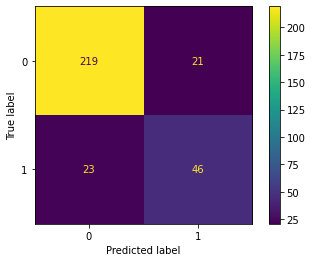

0.8576051779935275
0.7925921405906762
0.7957629209325274
0.7895833333333333
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       240
           1       0.69      0.67      0.68        69

    accuracy                           0.86       309
   macro avg       0.80      0.79      0.79       309
weighted avg       0.86      0.86      0.86       309

0.7895833333333333


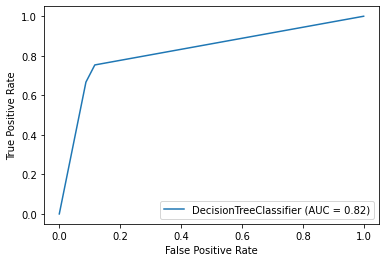

In [ ]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,accuracy_score ,f1_score, precision_score, recall_score,classification_report, plot_roc_curve,roc_auc_score
cm = confusion_matrix(y_test, y_pred6)
print(cm)
plot_confusion_matrix(classifier6,x_test,y_test,values_format='d')
plt.show()
print(accuracy_score(y_test, y_pred6))
print(f1_score(y_test, y_pred6,average='macro'))
print(precision_score(y_test,y_pred6,average='macro'))
print(recall_score(y_test,y_pred6,average='macro'))
print(classification_report(y_test, y_pred6))
print(roc_auc_score(y_test,y_pred6,average='macro'))

plot_roc_curve(classifier6,x_test,y_test)
plt.show()